In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [47]:
df = pd.read_csv('Telco_Customer_Churn.csv')

In [48]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking the various attributes of data like shape(rows and cols), Columns, datatypes

In [50]:
df.shape

(7043, 21)

In [51]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [52]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [53]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- SeniorCitizen is actually a categorical hence the 25%-50%-75% is not the proper distribution.

- 75% customer has tenure less than 55 months.

- Average MonthlyCharges are usd 64.76 but the 25% pays more than usd 89.85 per month.

In [54]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [55]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Text(0.5, 1.02, 'Count of Target Variable per category')

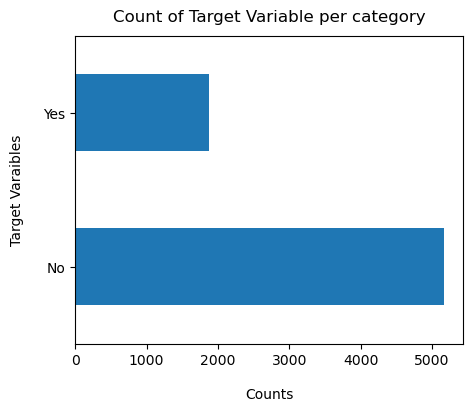

In [56]:
df['Churn'].value_counts().plot(kind='barh',figsize=(5,4))
plt.xlabel('Counts',labelpad=14)
plt.ylabel('Target Varaibles', labelpad=14)
plt.title('Count of Target Variable per category', y=1.02)

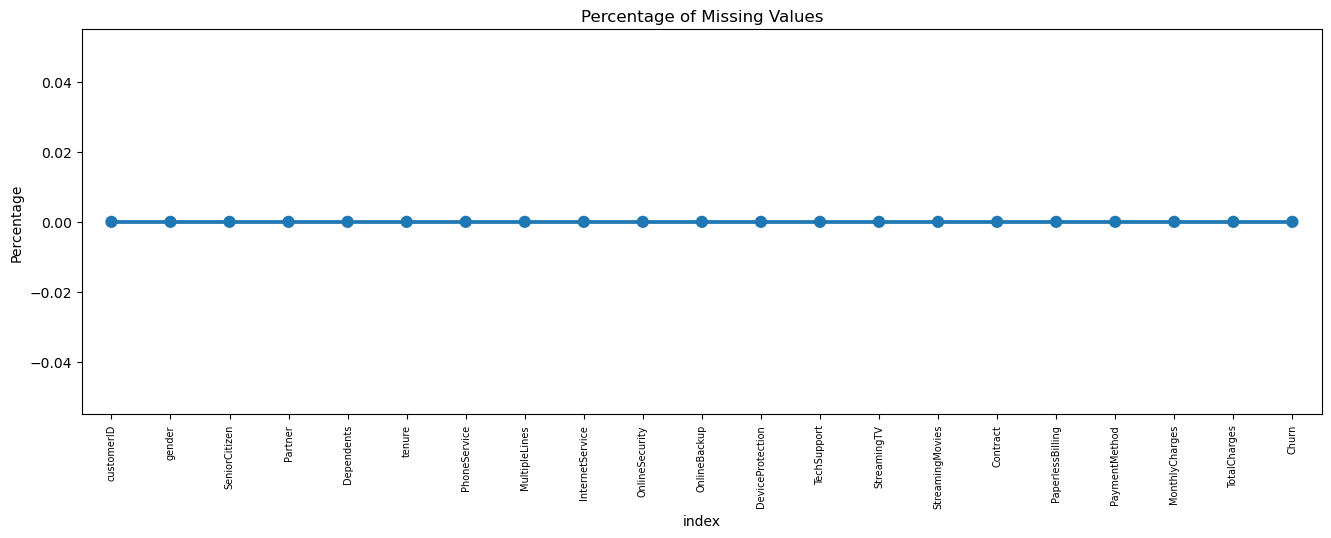

In [57]:
missing = pd.DataFrame({
    'index': df.isnull().sum().index,
    'percentage': (df.isnull().sum() * 100) / df.shape[0]
}).reset_index(drop=True)

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title('Percentage of Missing Values')
plt.ylabel('Percentage')
plt.show()

### Missing Data - Initial Intuition

- Here, we don't have any missing data.

#### General Thumb Rules:

- For features with less missing values - can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values - it is better to drop those columns as they give very less insight on analysis.
- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions have to be taken wisely.

### Data Cleaning

1. Creating a copy of base data for manipulating and procesing.

In [58]:
new_df = df.copy()

In [59]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Converting TotalCharges from an object to the numeric value.

In [60]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As there are 11 missing values in the TotalCharges column. Let's check the records.

In [61]:
new_df.loc[new_df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatment

Since the % of these records compared to the total dataset is very low, i.e., 0.15%, it is safe to ignore them from further processing.

In [62]:
# Removing missing values
new_df.dropna(how='any', inplace=True)

# telco_data.fillna(0)

5. Dividing customers into bins based on tenure e.g., for tenure < 12 months: assign a tenure group if 1–12, for tenure between 1 to 2 years, tenure group of 13–24; so on...

In [63]:
# Get the max tenure
print(new_df['tenure'].max())  # 72

72


In [64]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [65]:
#Group the tenure in bins for 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

new_df['tenure_group'] = pd.cut(new_df.tenure, range(1, 80, 12), right= False, labels=labels)

In [66]:
new_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [67]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


6. Removing columns not required for preprocessing.

In [68]:
#droping column CustomerID and Tenure
new_df.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

In [69]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

*1. *Plot distribution of individual predictor by churn.

### Univariate Analysis

In [70]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [75]:
new_df.Churn.value_counts()/len(new_df)*100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


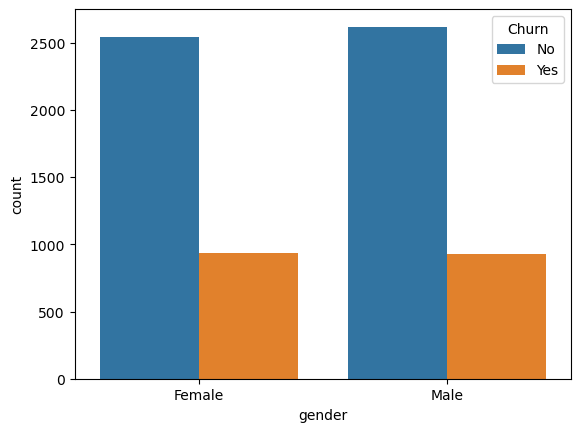

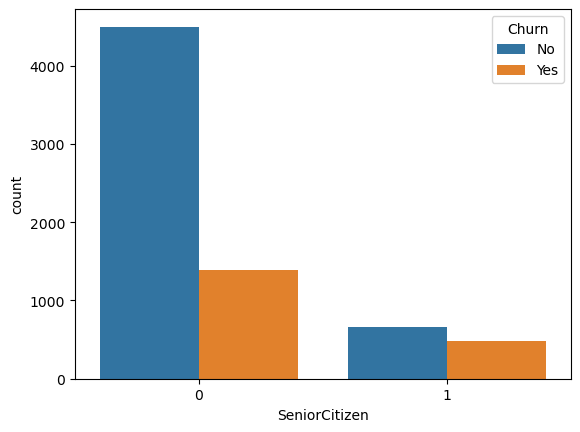

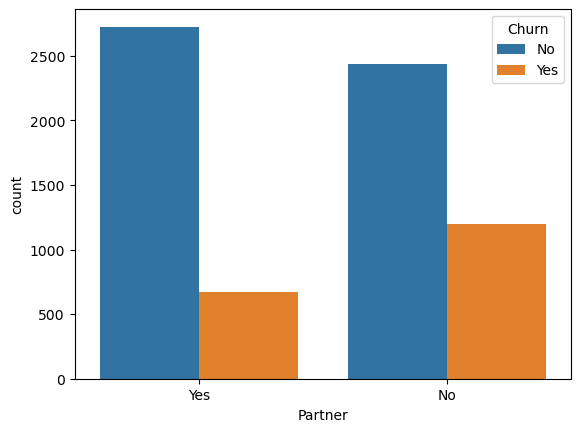

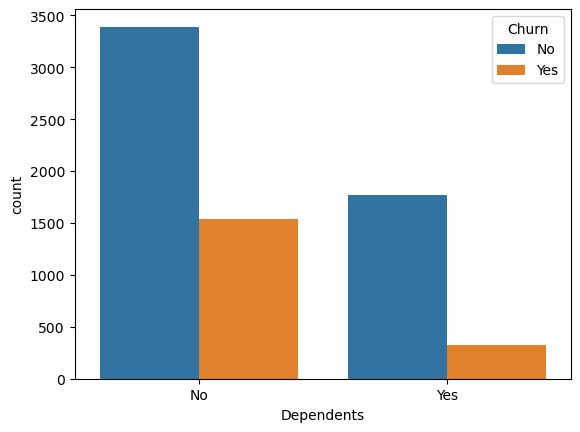

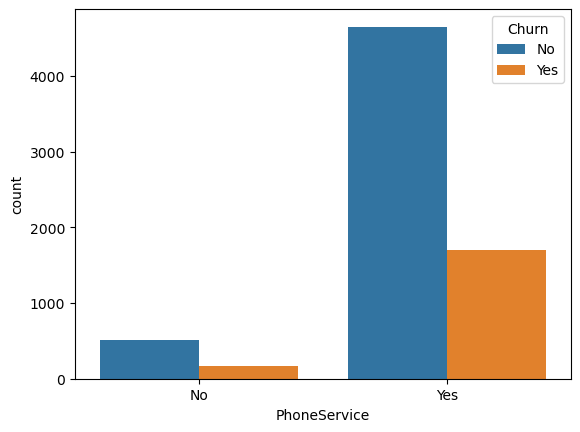

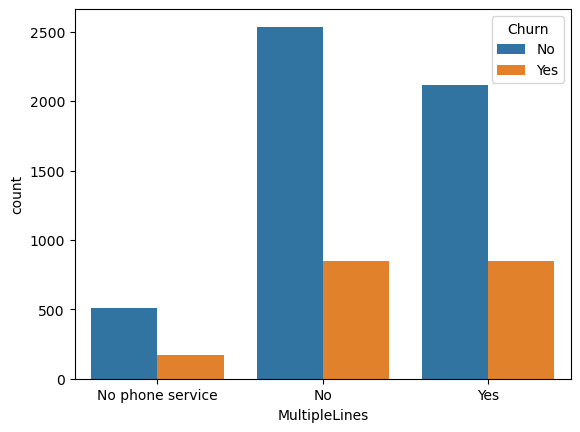

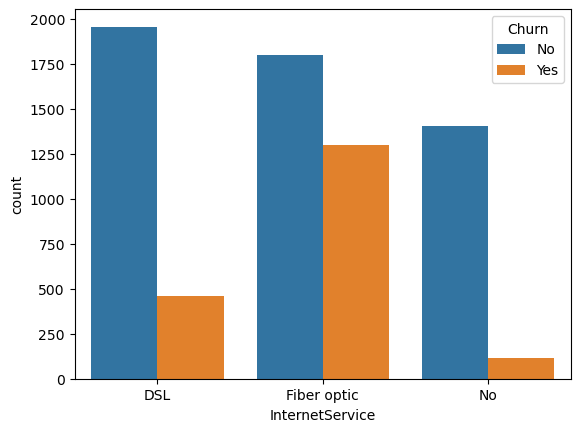

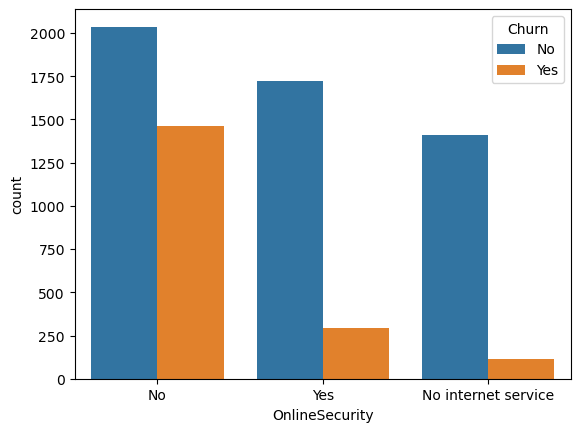

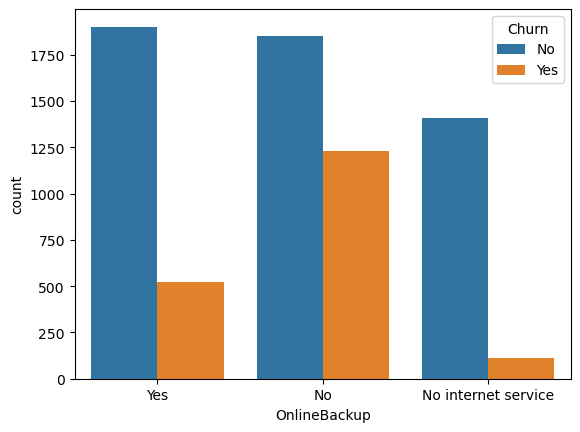

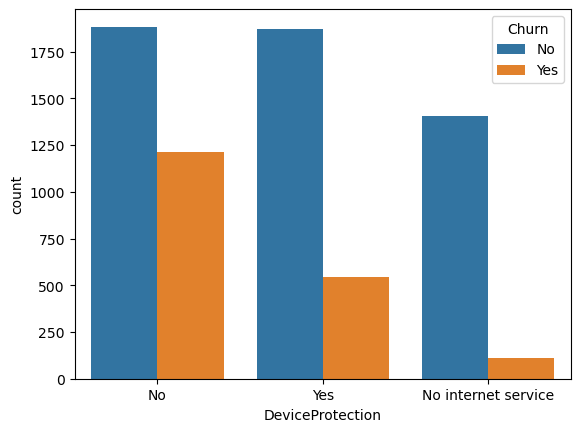

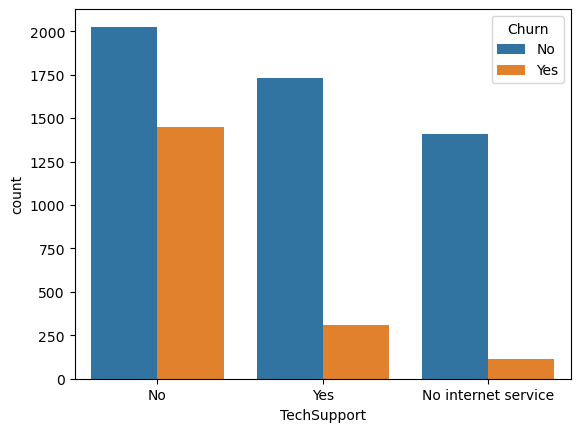

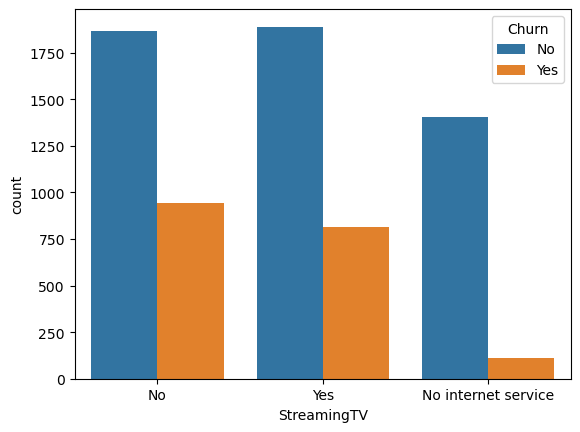

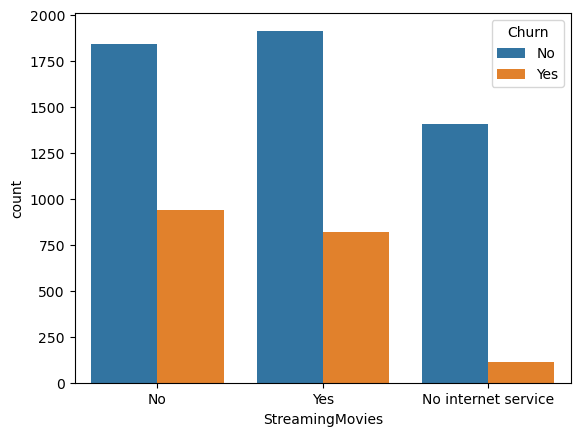

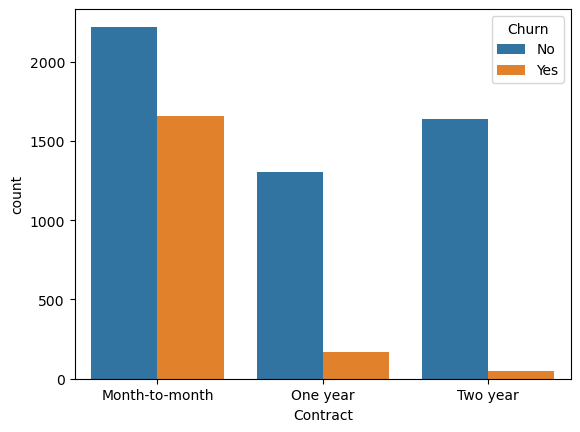

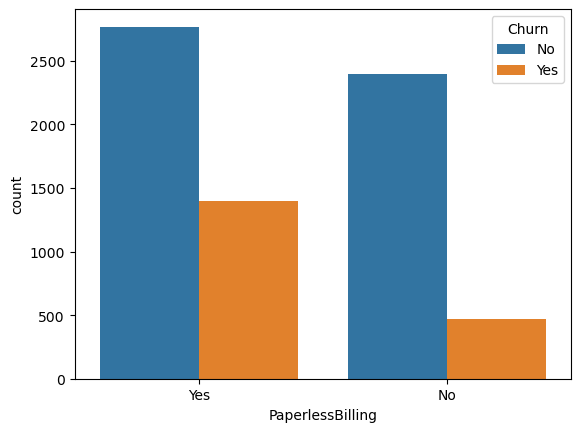

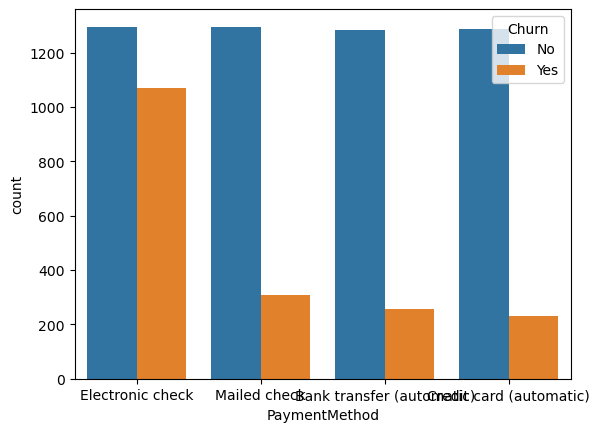

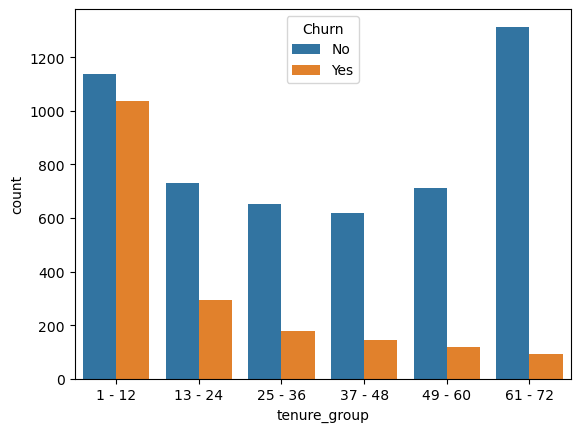

In [71]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df, x=predictor, hue='Churn')

### Numerical Analysis

In [77]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [78]:
new_df1_target0 = new_df[new_df['Churn']=='No']
new_df1_target1 = new_df[new_df['Churn']=='Yes']

In [80]:
new_df1_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [81]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


Converting the target variable 'Churn' into the binary numeric variable i.e. yes=1, no=0

In [82]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [83]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Converting all the categorical variable into dummy variable.

In [85]:
new_df_dummies = pd.get_dummies(new_df).astype(int)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relationship between Monthly Charges and total charges

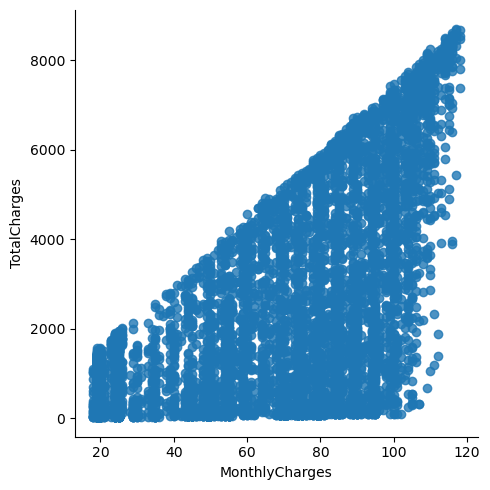

In [86]:
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [87]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6511252380434778

Total Charges increase as Monthly Charges increase - as expected.

Churn by Monthly Charges and Total Charges

C:\Users\ACER\AppData\Local\Temp\ipykernel_1048\525196884.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0)],
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\AppData\Local\Temp\ipykernel_1048\525196884.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1)],
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Text(0.5, 1.0, 'Monthly charges by churn')

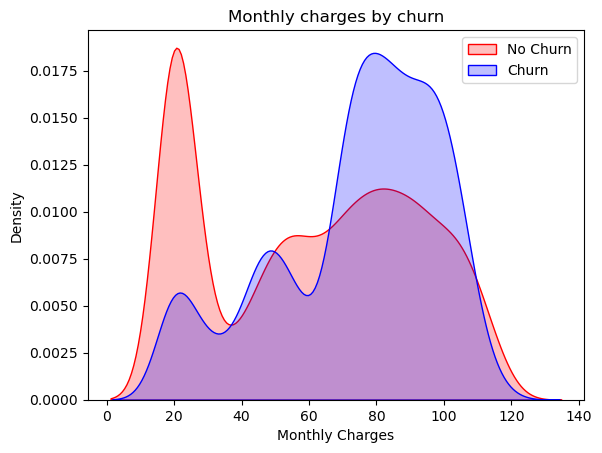

In [88]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0)], 
                  color="Red", shade=True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1)], 
                  ax=Mth, color="Blue", shade=True)
Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_ylabel("Density")
Mth.set_xlabel("Monthly Charges")
Mth.set_title("Monthly charges by churn")

Insight: Churn is high when Monthly Charges are high

C:\Users\ACER\AppData\Local\Temp\ipykernel_1048\701277928.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0)],
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\AppData\Local\Temp\ipykernel_1048\701277928.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1)],
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 1.0, 'Total charges by churn')

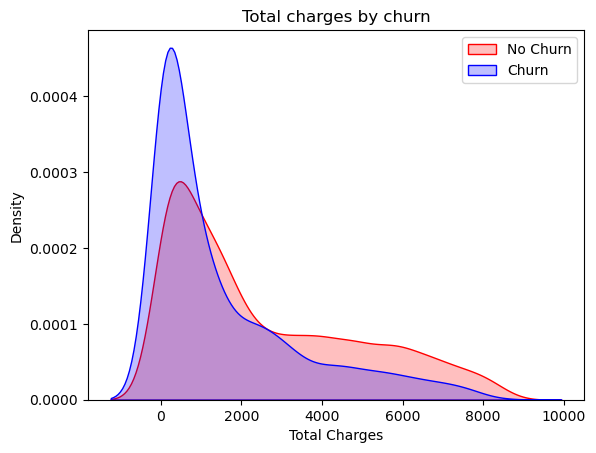

In [89]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0)], 
                  color="Red", shade=True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1)], 
                  ax=Tot, color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc="upper right")
Tot.set_ylabel("Density")
Tot.set_xlabel("Total Charges")
Tot.set_title("Total charges by churn")


The extracted text from the image is:

Surprising insight as higher Churn at lower Total Charges.

However, if we combine the insights of 3 parameters i.e., Tenure, Monthly Charges & Total Charges, then the picture is a bit clear: Higher Monthly Charge at lower tenure results in lower Total Charge. Hence, all these 3 factors, viz. Higher Monthly Charge, Lower Tenure, and Lower Total Charge, are linked to High Churn.

Build a correlation of all predictors with 'Churn'

<Axes: >

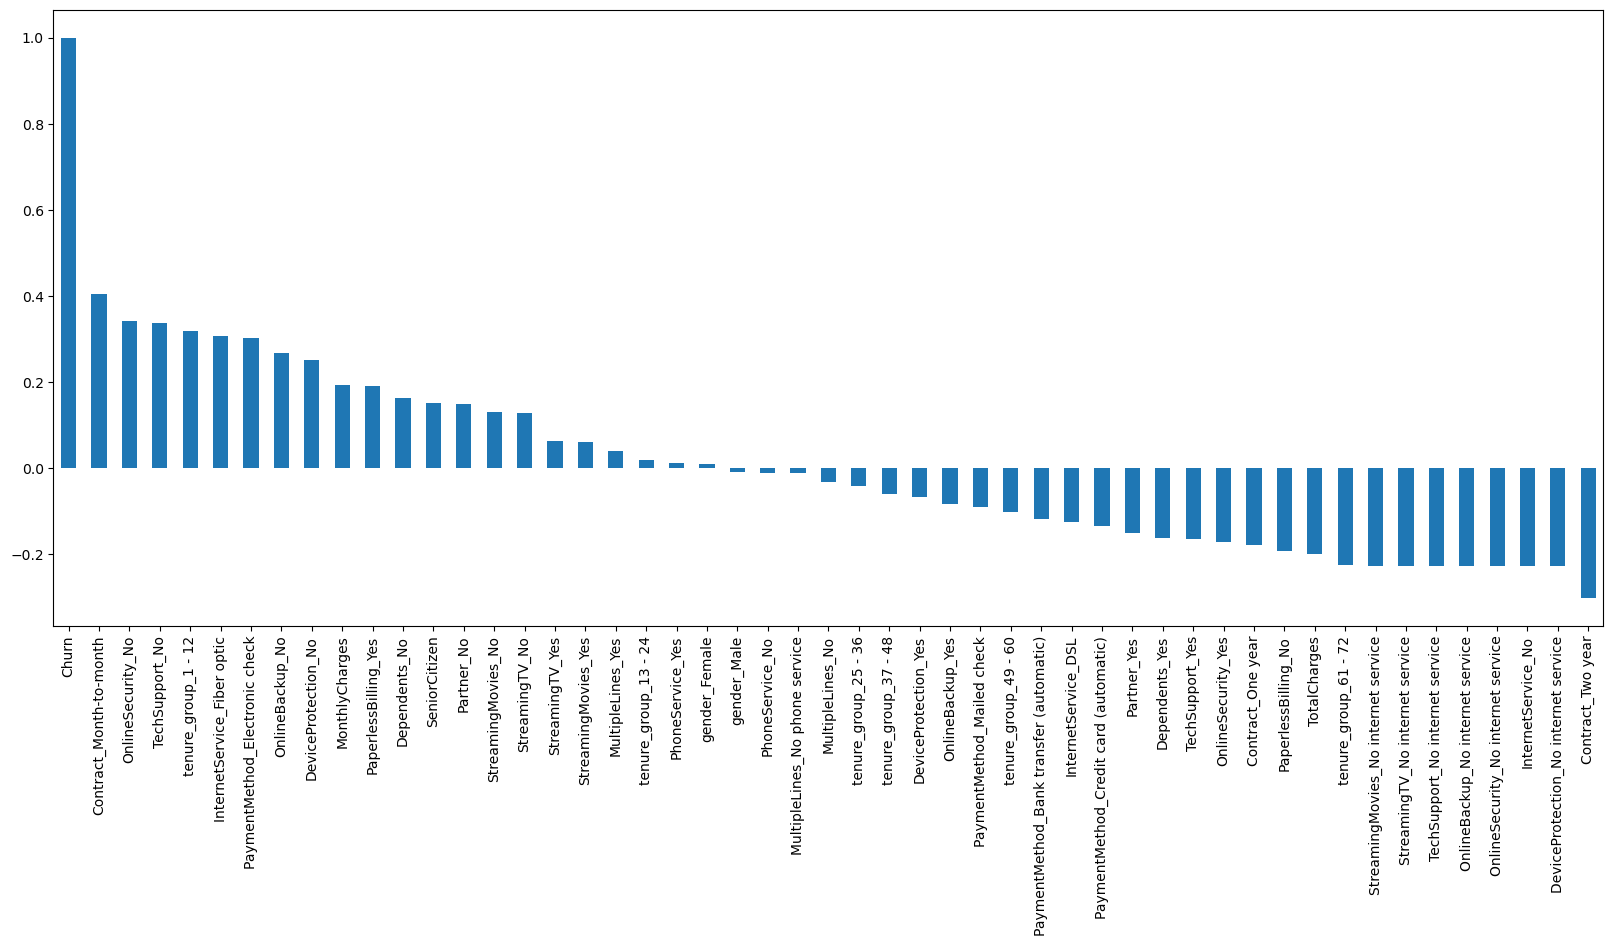

In [90]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Derived Insight:

HIGH Churn is seen in the case of month-to-month contracts, no online security, no tech support, first year of subscription, and fiber optics internet.

LOW Churn is seen in the case of long-term contracts, subscriptions without internet service, and customers engaged for 5+ years.

Factors like gender, availability of phone service, and the number of multiple lines have almost NO impact on churn.

This is also evident from the heatmap below:

<Axes: >

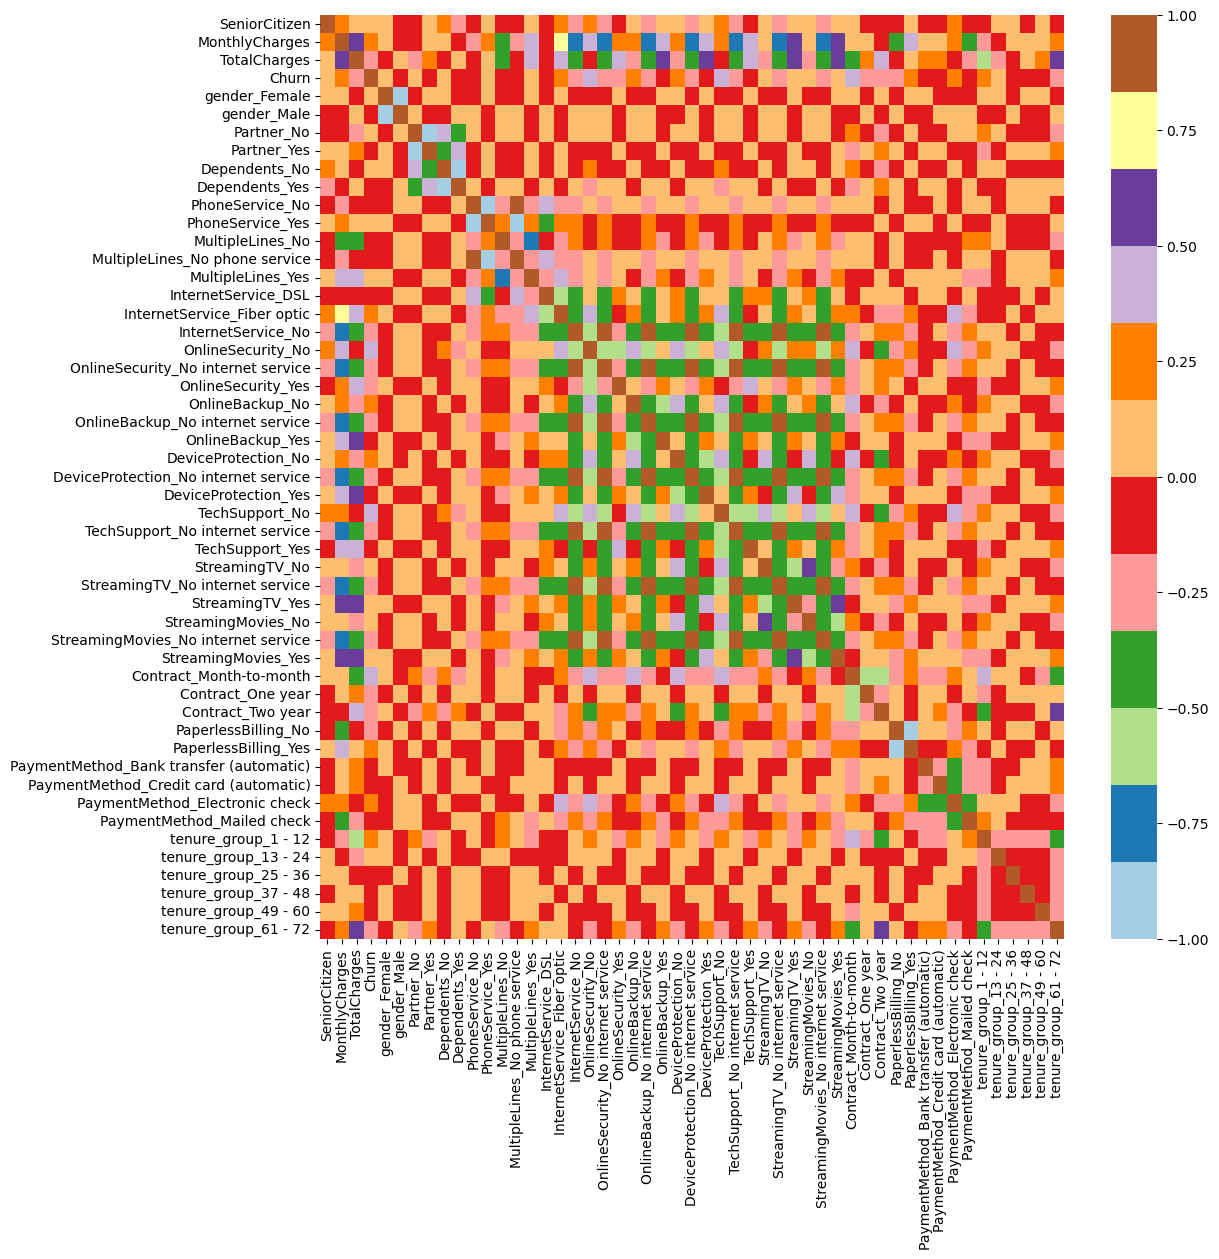

In [92]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [93]:
new_df1_target0 = new_df.loc[new_df['Churn']==0]
new_df1_target1 = new_df.loc[new_df['Churn']==1]

In [94]:
len(new_df1_target0)

5163

In [95]:
len(new_df1_target1)

1869

In [96]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data=hue)

    fig, ax = plt.subplots()

    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())

    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    plt.yscale('log')

    plt.title(title)

    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')

    plt.show()

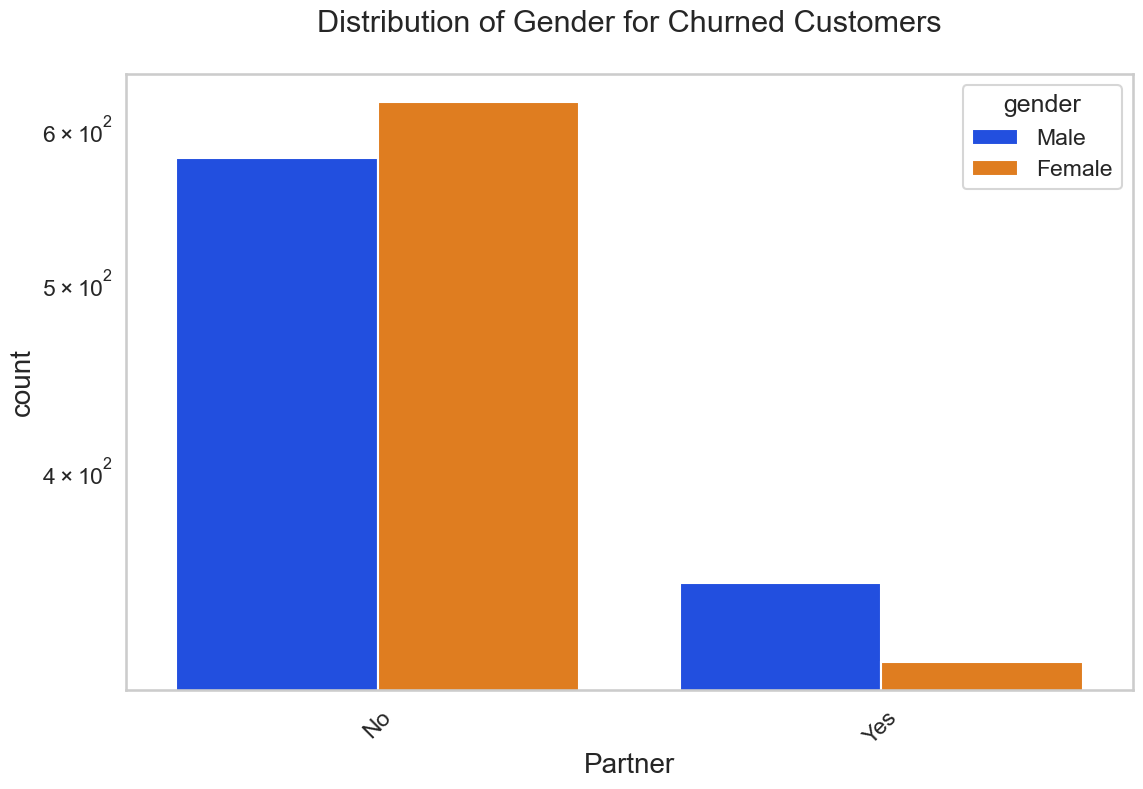

In [97]:
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

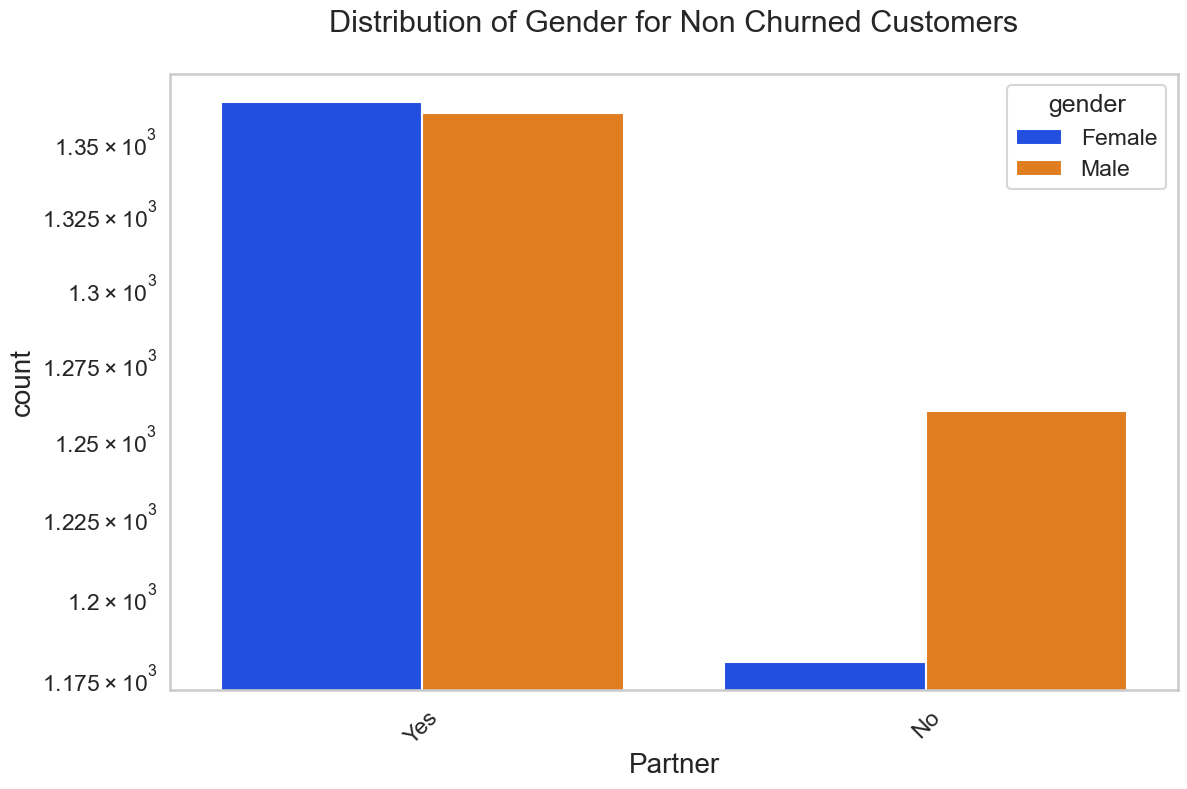

In [98]:
uniplot(new_df1_target0, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')

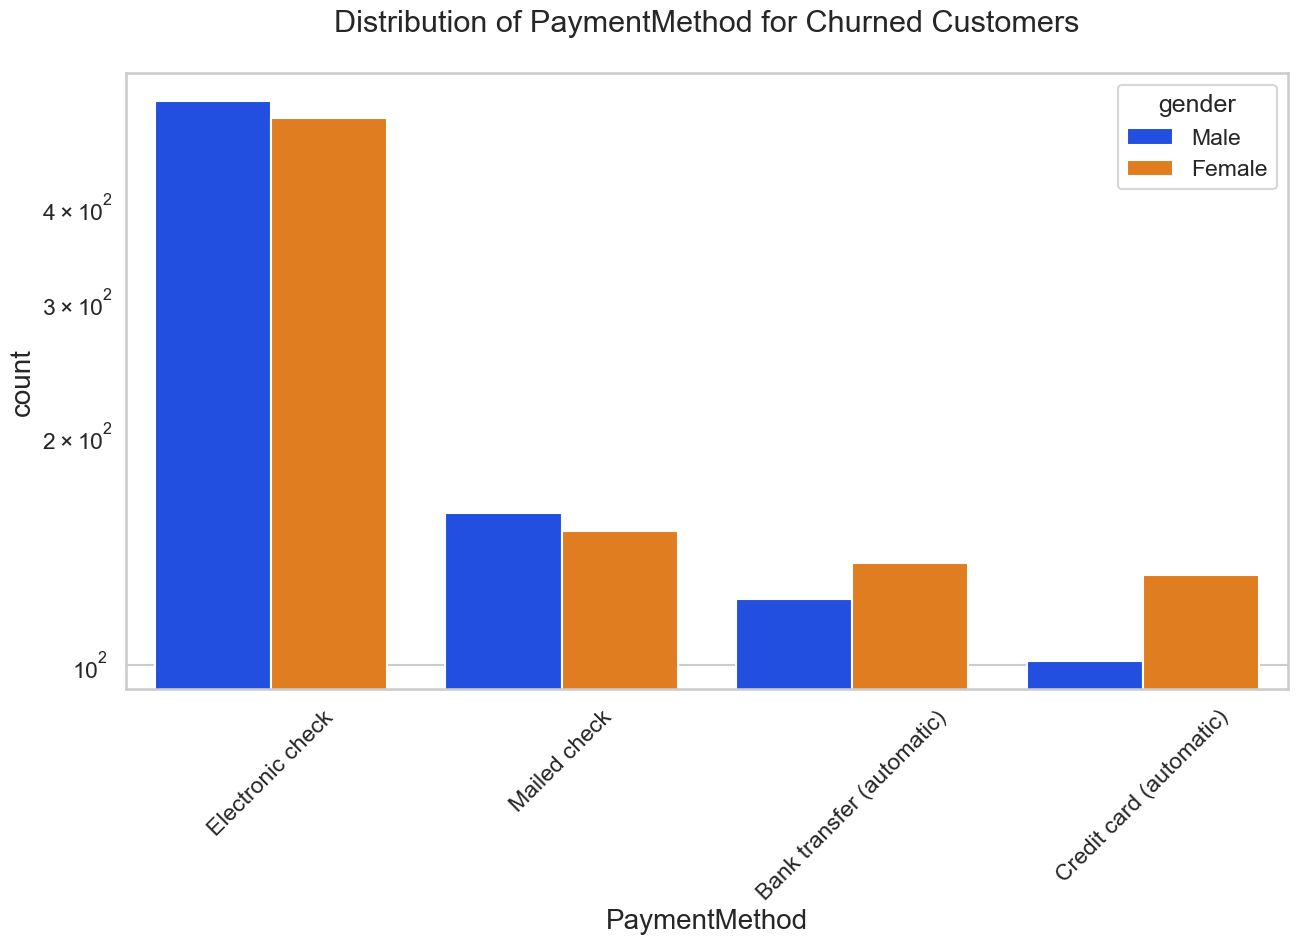

In [101]:
uniplot(new_df1_target1, col='PaymentMethod', title='Distribution of PaymentMethod for Churned Customers', hue='gender')

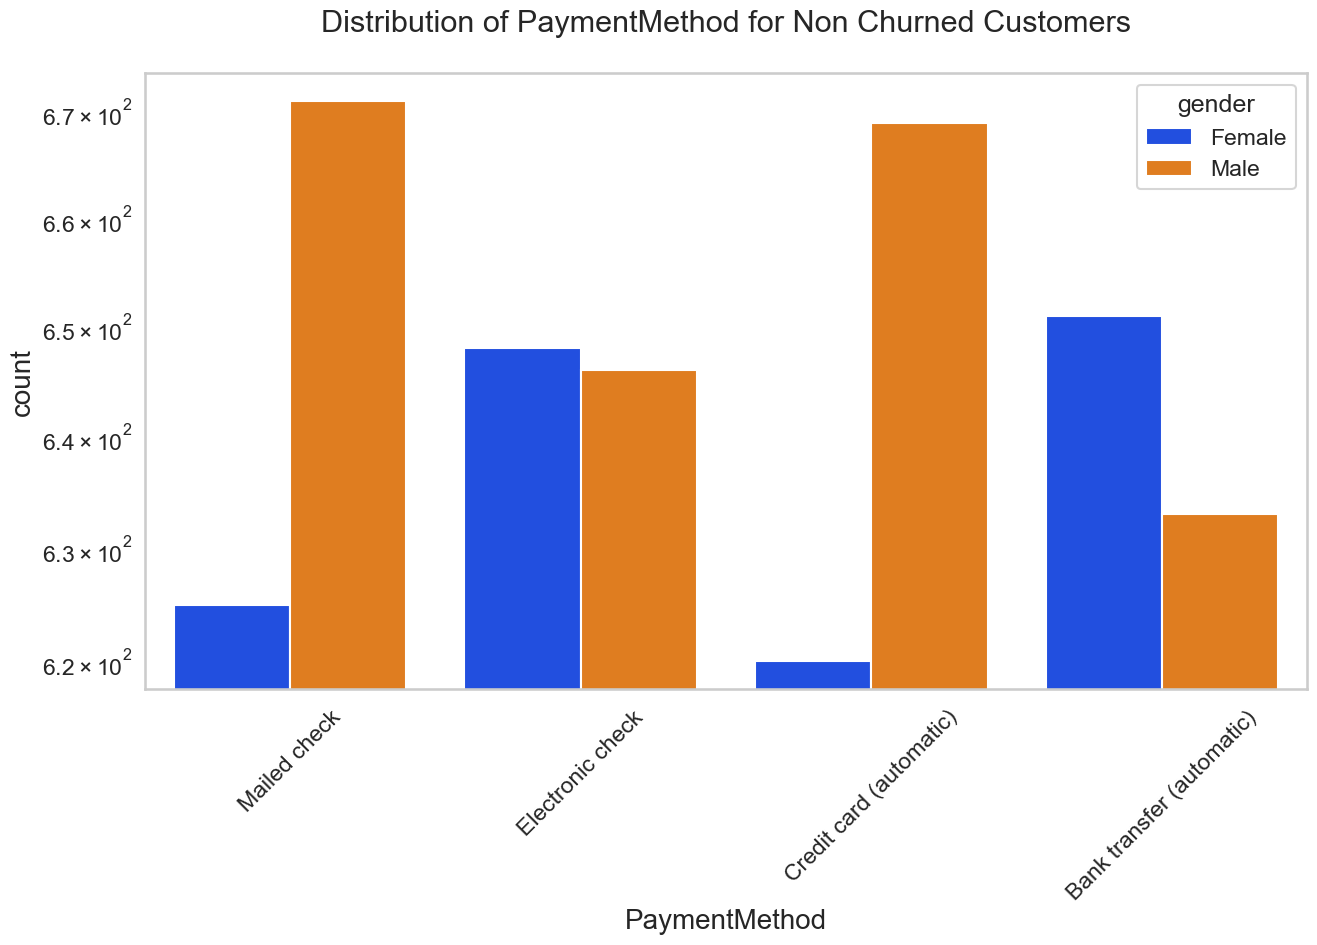

In [102]:
uniplot(new_df1_target0, col='PaymentMethod', title='Distribution of PaymentMethod for Non Churned Customers', hue='gender')

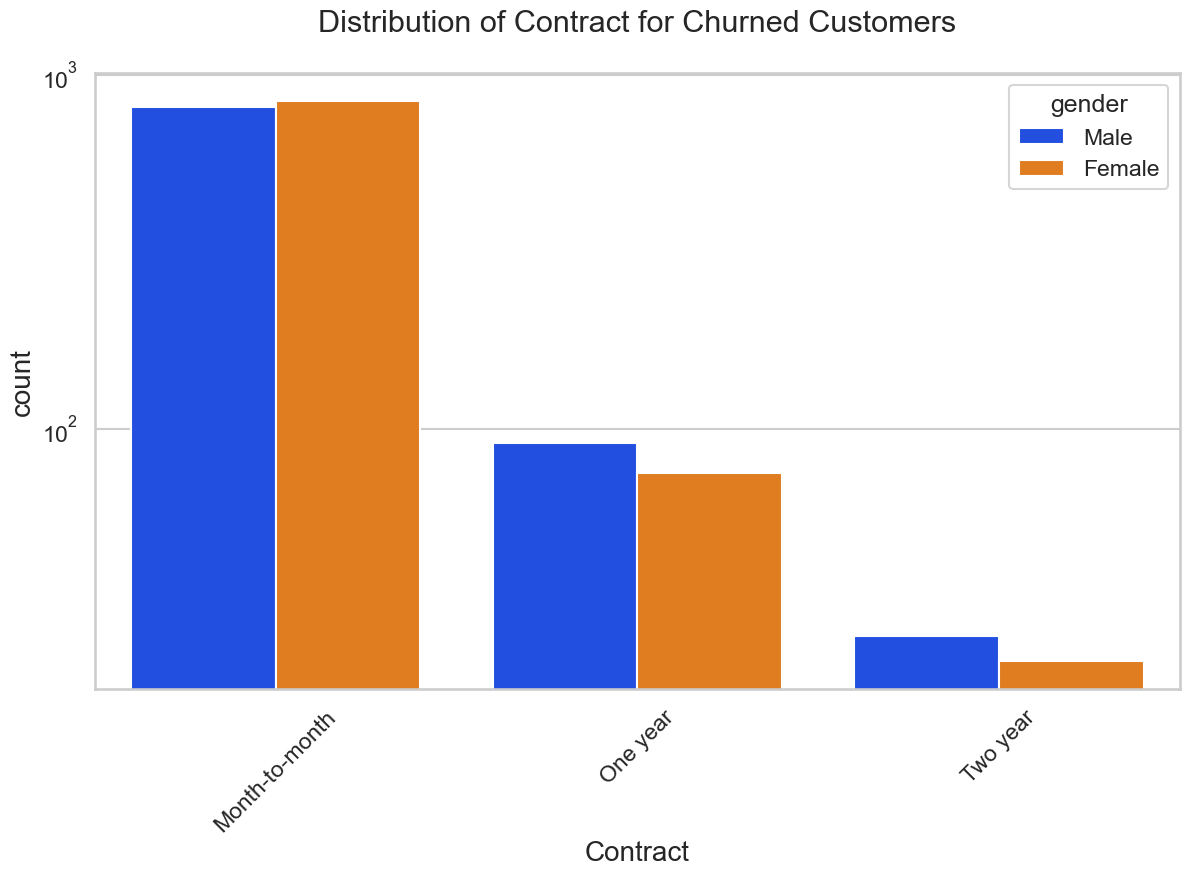

In [103]:
uniplot(new_df1_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender') 

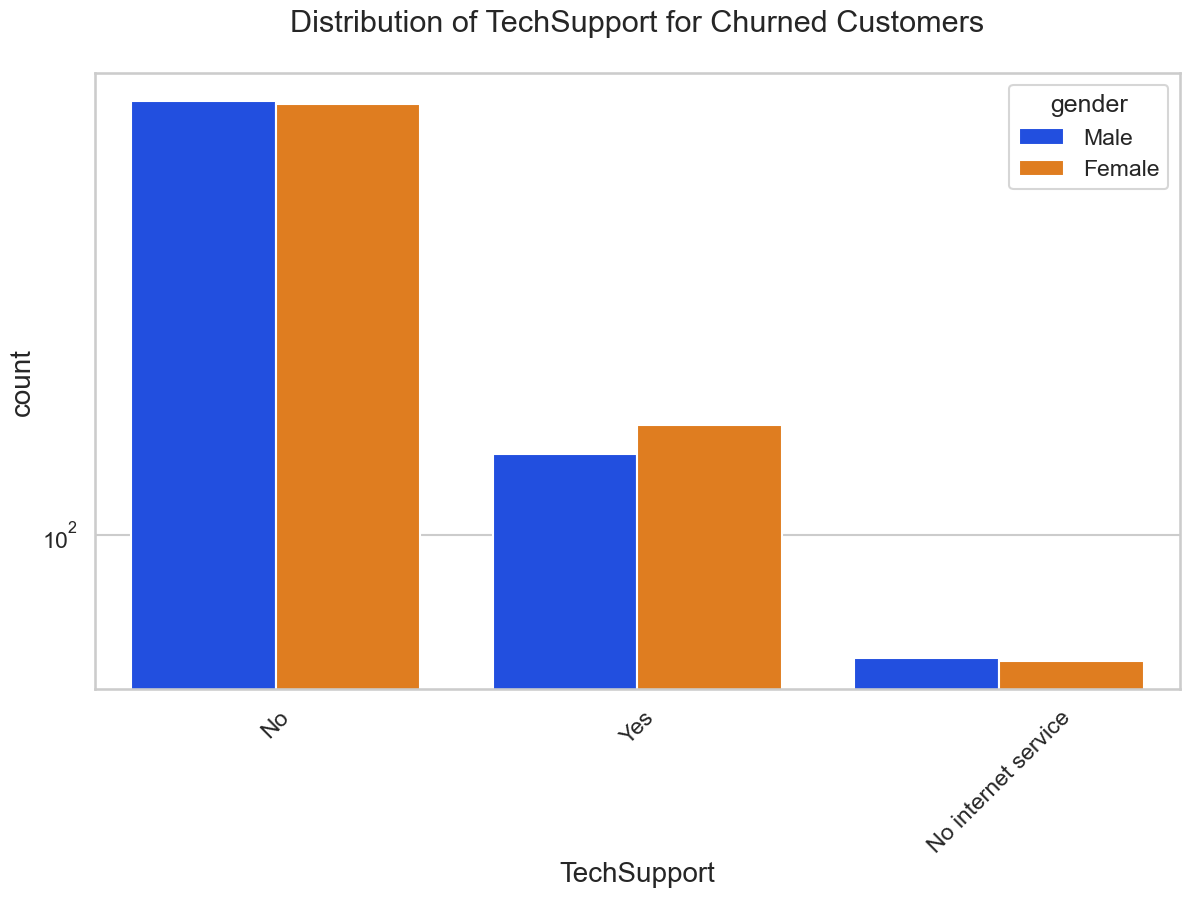

In [105]:
uniplot(new_df1_target1, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender') 

### Conclusion

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)